In [1]:
import pandas as pd

from sklearn import tree
from sklearn import metrics

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this line ensures that the plot is displayed inside the notebook
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\APP\\Study\\ML\\Datasets\\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# a mapping directory that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [5]:
# you can use the 'map' function of pandas with any dictionary to convert the values
# in a column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 rows are selected for testing/validation
df_test = df.tail(559)

In [27]:
# this is our global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [18]:
# initialize decision tree classifier class with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)

In [9]:
# choose the columns you want to train on 
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [19]:
# train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

In [21]:
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

In [22]:
# calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

In [23]:
# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [24]:
print(train_accuracy)
print(test_accuracy)

0.778
0.5474060822898033


In [ ]:
# BELOW IS AN APPROACH TO TRY DIFFERENT 'max_depth' AND CHECK FOR ACCURACIES
# It is similar to what is done above but the process is iterated using for-loop to check different values for 'max_depth'

In [31]:
# initialize lists to store accuracies for training and test data.
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [32]:
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    
    # fit the model on given features
    clf2.fit(df_train[cols], df_train.quality)
    
    # create training & testing predictions
    train_predictions = clf2.predict(df_train[cols])
    test_predictions = clf2.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

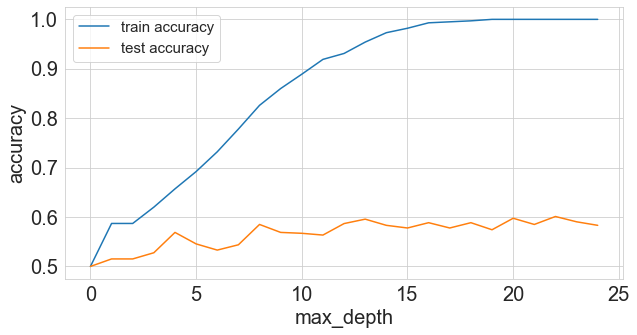

In [34]:
# create two plots using matplotlib and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()